In [268]:
%autosave 60

Autosaving every 60 seconds


In [269]:
%run init.ipynb
%run init-tensor_product.ipynb
%run init-quantum_resources.ipynb
%run init-optical_elements.ipynb

In [270]:
from qiskit.quantum_info import entropy, DensityMatrix

In [271]:
%run init-qiskit.ipynb

ibmqfactory.load_account:WARNING:2023-05-31 12:28:06,282: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-05-31 12:28:12,565: Credentials are already in use. The existing account in the session will be replaced.


ibm_perth                    ibm_nairobi                  ibm_lagos
---------                    -----------                  ---------
Num. Qubits:  7              Num. Qubits:  7              Num. Qubits:  7
Pending Jobs: 220            Pending Jobs: 425            Pending Jobs: 195
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      181.0          Avg. T1:      109.2          Avg. T1:      131.2
Avg. T2:      142.2          Avg. T2:      67.2           Avg. T2:      73.7



ibmq_manila                  ibmq_jakarta                 ibmq_quito
-----------                  ------------                 ----------
Num. Qubits:  5              Num. Qubits:  7              Num. Qubits:  5
Pending Jobs: 433            Pending Jobs: 75             Pending Jobs: 46
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operati

In [272]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.20.2', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.19.1', 'qiskit-aqua': None, 'qiskit': '0.36.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [273]:
%run init-qiskit_optical_elements.ipynb

In [274]:
device = provider.get_backend('ibm_nairobi')

# Error bar

In [22]:
import random

valores_aleatorios = [round(random.uniform(0.0, 0.1), 4) for _ in range(10)]

print(valores_aleatorios)


[0.0742, 0.0726, 0.0193, 0.0761, 0.0024, 0.0068, 0.0998, 0.0377, 0.0214, 0.0362]


In [20]:
import random

valores_aleatorios = [round(random.uniform(0.0, 0.4), 4) for _ in range(10)]

print(valores_aleatorios)


[0.374, 0.0115, 0.2704, 0.3588, 0.0065, 0.2824, 0.3726, 0.0353, 0.3278, 0.2121]


In [14]:
import random

valores_aleatorios = [round(random.uniform(0.3, 0.4), 4) for _ in range(10)]

print(valores_aleatorios)


[0.3247, 0.3925, 0.326, 0.3233, 0.3587, 0.3391, 0.3704, 0.3032, 0.3176, 0.3396]


In [12]:
import random

valores_aleatorios = [round(random.uniform(0.4, 0.8), 4) for _ in range(10)]

print(valores_aleatorios)


[0.6877, 0.4455, 0.7559, 0.7294, 0.6983, 0.5615, 0.6069, 0.7888, 0.5975, 0.7666]


In [10]:
import random

valores_aleatorios = [round(random.uniform(0.75, 1), 4) for _ in range(10)]

print(valores_aleatorios)


[0.9453, 0.996, 0.9014, 0.9178, 0.8299, 0.8884, 0.9069, 0.9877, 0.878, 0.8528]


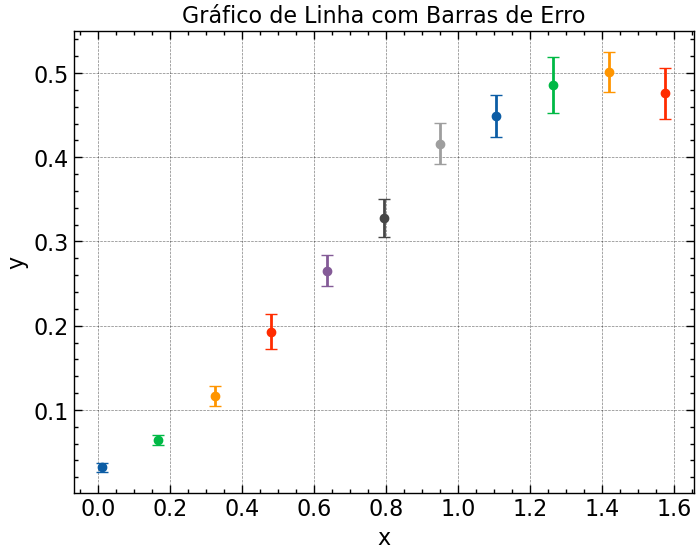

In [74]:
import matplotlib.pyplot as plt

# Dados

ret_Irr_b_in


# Calcular médias e desvios padrão para cada ponto x
means = [sum(y_vals) / len(y_vals) for y_vals in ret_Irr_b_in]
stds = [((sum([(val - mean) ** 2 for val in y_vals]) / len(y_vals)) ** 0.5) for y_vals, mean in zip(ret_Irr_b_in, means)]

# Configurar o gráfico
for i in range(11):
    plt.errorbar(th[i], means[i], yerr=stds[i], fmt='o', capsize=4)

# Rotular os eixos
plt.xlabel('x')
plt.ylabel('y')

# Título do gráfico
plt.title('Gráfico de Linha com Barras de Erro')

# Mostrar o gráfico
plt.show()

# Irrealidade do caminho $b$ dentro do IMZ

## BBO$_{p}$ - Dentro do IMZ - QWP$_{in}$

<img src = 'setup_realism.jpg' width = '90%'>

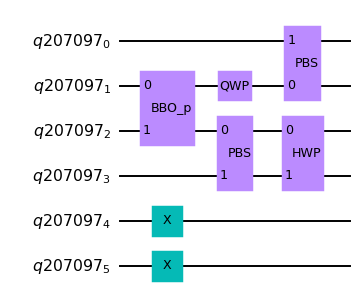

In [275]:
def qc_QCRb_in(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])              # BBO_p
    qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                            # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                      # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                      # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                      # HWP
    qc.x(4); qc.x(5)                                                           # Atoms's innitial state
    #qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    #qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                            # Phase
    #qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRb_in_ = qc_QCRb_in(math.pi); qc_QCRb_in_.draw(output = 'mpl', scale = 0.7)

## Retrieve $b_{in}$ 

In [276]:
f = open("jobs_ids_b_in.txt","r")
list_ids_b_in_ = f.read().replace("'","").replace(" ","").replace("[","").replace("]","").split(",")
f.close()

In [277]:
len(list_ids_b_in_)

In [115]:
list_ids_b_in_

['chnjhptaqbbvbu6qo6pg',
 'chnm5htaqbbvbu6sdgbg',
 'chnopv0uhh1ldcoctor0',
 'chnp2eguhh1ldcod2s7g',
 'chnp65cpd6rr9ji3ln10',
 'chnp9o5aqbbvbu6u7g4g',
 'chnpd5k2b9sdqn1q4ja0',
 'chnpf942b9sdqn1q5ucg',
 'chnph7n8rmtc64q4bnj0',
 'chnpj5v8rmtc64q4cu7g',
 'chnpntk2b9sdqn1qb9a0',
 'chnpt6k2b9sdqn1qejo0',
 'chnpv5v8rmtc64q4kk60',
 'chnq13qnajhpa63uf620',
 'chnq44qnajhpa63ugsc0',
 'chnq6r5aqbbvbu6up5mg',
 'chnqa1guhh1ldcodqfk0',
 'chnqdglaqbbvbu6usteg',
 'chnqgvkpd6rr9ji4fjqg',
 'chnqk8guhh1ldcoe0b90',
 'chnqu7anajhpa63v07vg',
 'chnr1878rmtc64q58ufg',
 'chnr5i0uhh1ldcoearf0',
 'chnr96f8rmtc64q5du00',
 'chnrcrf8rmtc64q5gbh0',
 'chnrgqtaqbbvbu6vijpg',
 'chnrkespd6rr9ji55hag',
 'chnrocf8rmtc64q5n27g',
 'chnrs62najhpa63vi69g',
 'chnrvvqnajhpa63vkd4g',
 'chns4hlaqbbvbu6vtmog',
 'chns7rdaqbbvbu6vvetg',
 'chnsbr8uhh1ldcof0nc0',
 'chnsfl2najhpa63vsefg',
 'chnsjhinajhpa63vubkg',
 'chnsn7kpd6rr9ji5o0q0',
 'chnsr778rmtc64q69n20',
 'chnsuv8uhh1ldcofa72g',
 'chnt41kpd6rr9ji5urp0',
 'chnt8b5aqbbvbu70fskg',


In [299]:
# Lista invertida
list_ids_b_in_.reverse()

In [117]:
list_ids_b_in_

['chqq08s2b9sdqn3pvb6g',
 'chqcv3taqbbvbu0mhg80',
 'chqcs4v8rmtc64rtl1qg',
 'chqck08uhh1ldcq57rkg',
 'chqci48uhh1ldcq56d6g',
 'chqcfcv8rmtc64rtasj0',
 'chqccn42b9sdqn3gvt50',
 'chqca2n8rmtc64rt6i60',
 'chqc865aqbbvbu0lvgqg',
 'chqc624pd6rr9jjrmun0',
 'chqc3rkpd6rr9jjrl8cg',
 'chqc0nk2b9sdqn3gmncg',
 'chqbtjguhh1ldcq4mdm0',
 'chqbpkv8rmtc64rsp2q0',
 'chqbfls2b9sdqn3g5je0',
 'chqb9lqnajhpa65l28vg',
 'chqb7houhh1ldcq3ugo0',
 'chqb432najhpa65kt600',
 'chqb0f4pd6rr9jjqhgvg',
 'chqatcv8rmtc64rrqr2g',
 'chqant78rmtc64rrm6qg',
 'chqalocpd6rr9jjq8k5g',
 'chqajodaqbbvbu0kea4g',
 'chqahgv8rmtc64rrgrmg',
 'chqaf9kpd6rr9jjq39hg',
 'chqadev8rmtc64rrd8qg',
 'chqabcs2b9sdqn3f5mag',
 'chqa9c78rmtc64rr9mj0',
 'chqa7ec2b9sdqn3f2al0',
 'chqa375aqbbvbu0k04h0',
 'chq68qdaqbbvbu0hbnrg',
 'chq650n8rmtc64rob8j0',
 'chq617spd6rr9jjmul00',
 'chq5tidaqbbvbu0h47e0',
 'chq5pkanajhpa65h2k00',
 'chq3lj78rmtc64rmo24g',
 'chpcrqn8rmtc64r92070',
 'chp97ek2b9sdqn2r55e0',
 'chp5jbdaqbbvbu7t4rkg',
 'chp3i3f8rmtc64r2fepg',


In [278]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
ret_rhob_AbWZ_in             = np.zeros(th.shape[0], dtype=object)
ret_rhob_0bWZ_in             = np.zeros(th.shape[0], dtype=object)
ret_Phi_b_0bWZ_in            = np.zeros(th.shape[0], dtype=object)
ret_Irr_b_in                 = []

In [279]:
print(device)
for j in range(11):
    print('-----------------------------------------')
    print('j = {:2d}  - theta = {}'.format(j, th[j]))
    print('-----------------------------------------')
    k = 10*j
    x = []
    for l in range(k, k+10):
        print('l = {:2d}'.format(l))
        print(list_ids_b_in_[l])
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        job_ret_b_in = device.retrieve_job(list_ids_b_in_[l])
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        print(job_ret_b_in.job_id())
        qstf = StateTomographyFitter(job_ret_b_in.result(), qstc)
        #
        # rho
        #
        ret_rhob_AbWZ_in[j] = qstf.fit(method='lstsq')
        ret_rhob_0bWZ_in[j] = projM_np(8, '0', ret_rhob_AbWZ_in[j])
        ret_Phi_b_0bWZ_in[j] = dephasing_map_3qubits_np(ret_rhob_0bWZ_in[j])
        x.append(entropy(ret_Phi_b_0bWZ_in[j]) - entropy(ret_rhob_0bWZ_in[j]))
        print(x[l-k])
        if len(x) % 10 ==0:
            ret_Irr_b_in.append(x)
            print(ret_Irr_b_in)

ibm_nairobi
-----------------------------------------
j =  0  - theta = 0.01
-----------------------------------------
l =  0
chnjhptaqbbvbu6qo6pg
chnjhptaqbbvbu6qo6pg
0.4133316553280668
l =  1
chnm5htaqbbvbu6sdgbg
chnm5htaqbbvbu6sdgbg
0.4962955809291112
l =  2
chnopv0uhh1ldcoctor0
chnopv0uhh1ldcoctor0
0.4556302277485458
l =  3
chnp2eguhh1ldcod2s7g
chnp2eguhh1ldcod2s7g
0.5032497150696791
l =  4
chnp65cpd6rr9ji3ln10
chnp65cpd6rr9ji3ln10
0.4840792440775634
l =  5
chnp9o5aqbbvbu6u7g4g
chnp9o5aqbbvbu6u7g4g
0.4896920531692557
l =  6
chnpd5k2b9sdqn1q4ja0
chnpd5k2b9sdqn1q4ja0
0.45268862386995457
l =  7
chnpf942b9sdqn1q5ucg
chnpf942b9sdqn1q5ucg
0.5070103921777926
l =  8
chnph7n8rmtc64q4bnj0
chnph7n8rmtc64q4bnj0
0.5092257139069785
l =  9
chnpj5v8rmtc64q4cu7g
chnpj5v8rmtc64q4cu7g
0.4470250665929094
[[0.4133316553280668, 0.4962955809291112, 0.4556302277485458, 0.5032497150696791, 0.4840792440775634, 0.4896920531692557, 0.45268862386995457, 0.5070103921777926, 0.5092257139069785, 0.447025066592909

chocr7anajhpa64a3qn0
0.2505692420123795
l = 61
chohvrqnajhpa64ecr40
chohvrqnajhpa64ecr40
0.2913938396427005
l = 62
choj97kpd6rr9jil2vi0
choj97kpd6rr9jil2vi0
0.2553510901305682
l = 63
choktac2b9sdqn2bvu4g
choktac2b9sdqn2bvu4g
0.27078462801453806
l = 64
choo02c2b9sdqn2doio0
choo02c2b9sdqn2doio0
0.2787454325133336
l = 65
chori978rmtc64qr1ki0
chori978rmtc64qr1ki0
0.27483064386777145
l = 66
chos21laqbbvbu7l04mg
chos21laqbbvbu7l04mg
0.28998291764868456
l = 67
chotug2najhpa64naemg
chotug2najhpa64naemg
0.24748041229466766
l = 68
chouu6f8rmtc64qv3f9g
chouu6f8rmtc64qv3f9g
0.2622269301722502
l = 69
chp105cpd6rr9jivpt3g
chp105cpd6rr9jivpt3g
0.23353532913090902
[[0.4133316553280668, 0.4962955809291112, 0.4556302277485458, 0.5032497150696791, 0.4840792440775634, 0.4896920531692557, 0.45268862386995457, 0.5070103921777926, 0.5092257139069785, 0.4470250665929094], [0.4925812348436718, 0.5269590761452707, 0.5196648259599119, 0.4914730519257122, 0.44808693968090085, 0.5115141299129422, 0.538378040810494

chqc624pd6rr9jjrmun0
0.027269206288906833
l = 101
chqc865aqbbvbu0lvgqg
chqc865aqbbvbu0lvgqg
0.023453502181024044
l = 102
chqca2n8rmtc64rt6i60
chqca2n8rmtc64rt6i60
0.028260936737968034
l = 103
chqccn42b9sdqn3gvt50
chqccn42b9sdqn3gvt50
0.034386037412193815
l = 104
chqcfcv8rmtc64rtasj0
chqcfcv8rmtc64rtasj0
0.028747303648787526
l = 105
chqci48uhh1ldcq56d6g
chqci48uhh1ldcq56d6g
0.03363275100978025
l = 106
chqck08uhh1ldcq57rkg
chqck08uhh1ldcq57rkg
0.043462924662712954
l = 107
chqcs4v8rmtc64rtl1qg
chqcs4v8rmtc64rtl1qg
0.03314239336658398
l = 108
chqcv3taqbbvbu0mhg80
chqcv3taqbbvbu0mhg80
0.03430395096389938
l = 109
chqq08s2b9sdqn3pvb6g
chqq08s2b9sdqn3pvb6g
0.03233233411193215
[[0.4133316553280668, 0.4962955809291112, 0.4556302277485458, 0.5032497150696791, 0.4840792440775634, 0.4896920531692557, 0.45268862386995457, 0.5070103921777926, 0.5092257139069785, 0.4470250665929094], [0.4925812348436718, 0.5269590761452707, 0.5196648259599119, 0.4914730519257122, 0.44808693968090085, 0.511514129912942

## BBO$_{p}$ - Dentro do IMZ - QWP$_{out}$

<img src = 'setup_realism.jpg' width = '90%'>

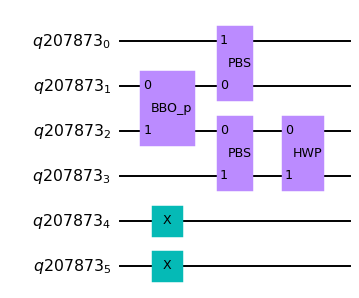

In [280]:
def qc_QCRb_out(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])              # BBO_p
    #qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                           # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                      # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                      # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                      # HWP
    qc.x(4); qc.x(5) # Atoms's innitial state
    #qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    #qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                            # Phase
    #qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRb_out_ = qc_QCRb_out(math.pi); qc_QCRb_out_.draw(output = 'mpl', scale = 0.7)

## Retrieve $b_{out}$ 

In [64]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
ret_rhob_AbWZ_out             = np.zeros(th.shape[0], dtype=object)
ret_rhob_0bWZ_out             = np.zeros(th.shape[0], dtype=object)
ret_Phi_b_0bWZ_out            = np.zeros(th.shape[0], dtype=object)
ret_Irr_b_out                 = np.zeros(th.shape[0])

In [65]:
f = open("jobs_ids_b_out.txt","r")
list_ids_b_out_ = f.read().replace("'","").replace(" ","").replace("[","").replace("]","").split(",")
f.close()

In [66]:
list_ids_b_out_

['chelpsn7uma4tn78rc2g',
 'chep59kqqnv6prm1uccg',
 'chesmsf9targ2vpmqkig',
 'chf07ob66hmpifuql4jg',
 'chf0fj79targ2vpr406g',
 'chf0jqvppn69h5prdplg',
 'chf0o1nppn69h5pri8a0',
 'chf0s8g4sb77opi8pskg',
 'chf10jmo5i9gdbb1rjsg',
 'chf4t0sp8f687ogloj2g',
 'chf8gc6o5i9gdbbagde0',
 'chfcbncp8f687ogte7s0',
 'chfch9vppn69h5q89pug',
 'chfclgj66hmpifv83nr0',
 'chfcs3kp8f687ogtslfg',
 'chfd0e366hmpifv8cp7g',
 'chfd7c04sb77opiludd0',
 'chfde0f9targ2vq8tna0',
 'chfdkeo4sb77opim9rfg',
 'chfdorj66hmpifv92d4g',
 'chfdsjo4sb77opimh3g0']

In [67]:
print(device)
for j in range(0, d):
    print(list_ids_b_out_[j])
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    job_ret_b_out = device.retrieve_job(list_ids_b_out_[j])
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    print(job_ret_b_out.job_id())
    qstf = StateTomographyFitter(job_ret_b_out.result(), qstc)
    #
    # rho
    #
    ret_rhob_AbWZ_out[j] = qstf.fit(method='lstsq')
    ret_rhob_0bWZ_out[j] = projM_np(8, '0', ret_rhob_AbWZ_out[j])
    ret_Phi_b_0bWZ_out[j] = dephasing_map_3qubits_np(ret_rhob_0bWZ_out[j])
    ret_Irr_b_out[j] = entropy(ret_Phi_b_0bWZ_out[j]) - entropy(ret_rhob_0bWZ_out[j])
    print(ret_Irr_b_out[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chelpsn7uma4tn78rc2g
chelpsn7uma4tn78rc2g
0.03724904333858425
j =  0  - theta = 0.01
chep59kqqnv6prm1uccg
chep59kqqnv6prm1uccg
0.026173457920199206
j =  1  - theta = 0.16657963267948966
chesmsf9targ2vpmqkig
chesmsf9targ2vpmqkig
0.036787517030279826
j =  2  - theta = 0.3231592653589793
chf07ob66hmpifuql4jg
chf07ob66hmpifuql4jg
0.03918968650143695
j =  3  - theta = 0.479738898038469
chf0fj79targ2vpr406g
chf0fj79targ2vpr406g
0.04380441235784438
j =  4  - theta = 0.6363185307179586
chf0jqvppn69h5prdplg
chf0jqvppn69h5prdplg
0.04703039971492984
j =  5  - theta = 0.7928981633974483
chf0o1nppn69h5pri8a0
chf0o1nppn69h5pri8a0
0.05130806727519588
j =  6  - theta = 0.9494777960769379
chf0s8g4sb77opi8pskg
chf0s8g4sb77opi8pskg
0.05182945190347421
j =  7  - theta = 1.1060574287564275
chf10jmo5i9gdbb1rjsg
chf10jmo5i9gdbb1rjsg
0.06509734553319901
j =  8  - theta = 1.2626370614359173
chf4t0sp8f687ogloj2g
chf4t0sp8f687ogloj2g
0.0654033969086747
j =  9  - theta = 1.419216694115407
chf8gc6o5i9g

## Simulação $b_{in}$

In [281]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
sim_rhob_AbWZ_in             = np.zeros(th.shape[0], dtype=object)
sim_rhob_0bWZ_in             = np.zeros(th.shape[0], dtype=object)
sim_Phi_b_0bWZ_in            = np.zeros(th.shape[0], dtype=object)
sim_Irr_b_in                 = np.zeros(th.shape[0])

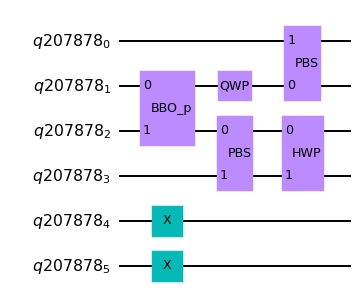

In [282]:
def qc_QCRb_in(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])              # BBO_p
    qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                            # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                      # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                      # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                      # HWP
    qc.x(4); qc.x(5)                                                           # Atoms's innitial state
    #qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    #qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                            # Phase
    #qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRb_in_ = qc_QCRb_in(math.pi); qc_QCRb_in_.draw(output = 'mpl', scale = 0.7)

In [283]:
for j in range(0, d):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    #
    # Circuito
    #
    qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    #
    # Tomography
    #
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    job = qiskit.execute(qstc, backend = simulator, shots=nshots)
    qstf = StateTomographyFitter(job.result(), qstc)
    #
    # rho
    #
    sim_rhob_AbWZ_in[j] = qstf.fit(method='lstsq')
    sim_rhob_0bWZ_in[j] = projM_np(8, '0', sim_rhob_AbWZ_in[j])
    sim_Phi_b_0bWZ_in[j] = dephasing_map_3qubits_np(sim_rhob_0bWZ_in[j])
    sim_Irr_b_in[j] = entropy(sim_Phi_b_0bWZ_in[j]) - entropy(sim_rhob_0bWZ_in[j])
    print(sim_Irr_b_in[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

0.005061846384855656
j =  0  - theta = 0.01
0.0557575696967289
j =  1  - theta = 0.16657963267948966
0.16675962771076513
j =  2  - theta = 0.3231592653589793
0.3163563658558905
j =  3  - theta = 0.479738898038469
0.45474768254795667
j =  4  - theta = 0.6363185307179586
0.5912667679840055
j =  5  - theta = 0.7928981633974483
0.7248121763330432
j =  6  - theta = 0.9494777960769379
0.8269475712678027
j =  7  - theta = 1.1060574287564275
0.9160431027197917
j =  8  - theta = 1.2626370614359173
0.9697190432520821
j =  9  - theta = 1.419216694115407
0.9738963295363715
j = 10  - theta = 1.5757963267948967
0.9699311765331928
j = 11  - theta = 1.7323759594743862
0.8976501711798306
j = 12  - theta = 1.8889555921538759
0.8247476985429764
j = 13  - theta = 2.0455352248333654
0.712645697584288
j = 14  - theta = 2.202114857512855
0.5937681181159701
j = 15  - theta = 2.358694490192345
0.4432283319771604
j = 16  - theta = 2.5152741228718343
0.2912449886103048
j = 17  - theta = 2.6718537555513238
0.1629

## Simulação $b_{out}$

In [284]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
sim_rhob_AbWZ_out            = np.zeros(th.shape[0], dtype=object)
sim_rhob_0bWZ_out            = np.zeros(th.shape[0], dtype=object)
sim_Phi_b_0bWZ_out           = np.zeros(th.shape[0], dtype=object)
sim_Irr_b_out                = np.zeros(th.shape[0])

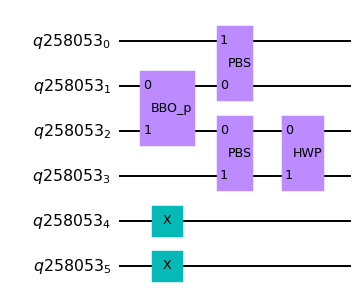

In [285]:
def qc_QCRb_out(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])              # BBO_p
    #qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                           # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                      # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                      # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                      # HWP
    qc.x(4); qc.x(5) # Atoms's innitial state
    #qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    #qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                            # Phase
    #qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRb_out_ = qc_QCRb_out(math.pi); qc_QCRb_out_.draw(output = 'mpl', scale = 0.7)

In [286]:
for j in range(0, d):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    #
    # Circuito
    #
    qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    #
    # Tomography
    #
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    job = qiskit.execute(qstc, backend = simulator, shots=nshots)
    qstf = StateTomographyFitter(job.result(), qstc)
    #
    # rho
    #
    sim_rhob_AbWZ_out[j] = qstf.fit(method='lstsq')
    sim_rhob_0bWZ_out[j] = projM_np(8, '0', sim_rhob_AbWZ_out[j])
    sim_Phi_b_0bWZ_out[j] = dephasing_map_3qubits_np(sim_rhob_0bWZ_out[j])
    sim_Irr_b_out[j] = entropy(sim_Phi_b_0bWZ_out[j]) - entropy(sim_rhob_0bWZ_out[j])
    print(sim_Irr_b_out[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

0.0022116657746293206
j =  0  - theta = 0.01
0.0029255072175974756
j =  1  - theta = 0.16657963267948966
0.0034208234723658373
j =  2  - theta = 0.3231592653589793
0.002365393645355908
j =  3  - theta = 0.479738898038469
0.0032528622081979333
j =  4  - theta = 0.6363185307179586
0.003882348350351776
j =  5  - theta = 0.7928981633974483
0.006049002932993153
j =  6  - theta = 0.9494777960769379
0.004588495469873333
j =  7  - theta = 1.1060574287564275
0.006014276385723938
j =  8  - theta = 1.2626370614359173
0.0027675835785872377
j =  9  - theta = 1.419216694115407
0.004844130390363972
j = 10  - theta = 1.5757963267948967
0.00634880650668844
j = 11  - theta = 1.7323759594743862
0.009493307428151146
j = 12  - theta = 1.8889555921538759
0.004645201164164656
j = 13  - theta = 2.0455352248333654
0.011034199593597527
j = 14  - theta = 2.202114857512855
0.015500589668569126
j = 15  - theta = 2.358694490192345
0.012870907584600022
j = 16  - theta = 2.5152741228718343
0.020135545099110502
j = 17

## Resultados teóricos

In [287]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
the_Irr_b_in                 = np.zeros(th.shape[0])
the_Irr_b_out                = np.zeros(th.shape[0])

In [288]:
for j in range(0,d):
    c_plus = np.cos(th[j]/2)
    c_minus = np.sqrt(1 - c_plus**2)
    the_Irr_b_in[j] = -1.0 * c_plus**2 * np.log2(1.0 * c_plus**2) - c_minus**2 * np.log2(c_minus**2)
    the_Irr_b_out[j] = 0
    print(the_Irr_b_in[j])

0.00041825654974191235
0.05960827160488702
0.1732975820045815
0.3131570775169316
0.4621607944535125
0.607604014273341
0.7394634336049204
0.849811316538504
0.932583510389106
0.9834895100553851
0.9999819663871292
0.9812490235560026
0.9282133180193721
0.8435331680632676
0.7316110586657141
0.5986265342290418
0.45263200118252755
0.30379873295430637
0.1650395819160478
0.05377438056525288
4.038739397709968e-31


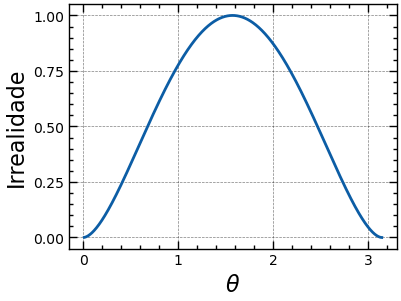

In [289]:
import numpy as np
import matplotlib.pyplot as plt

def func(theta):
    c_plus = np.cos(theta/2)
    c_minus = np.sqrt(1 - c_plus**2)
    return -1.0 * c_plus**2 * np.log2(1.0 * c_plus**2) - c_minus**2 * np.log2(c_minus**2)

theta_vals = np.linspace(0.01, np.pi, 1000)
y_vals = func(theta_vals)

plt.figure(figsize = (4,3), constrained_layout = True)
plt.style.use(['science', 'notebook', 'grid'])
plt.plot(theta_vals, y_vals)
plt.xlabel(r'$\theta$')
plt.ylabel('Irrealidade')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.title('Gráfico da função')
plt.show()


#### Gráficos

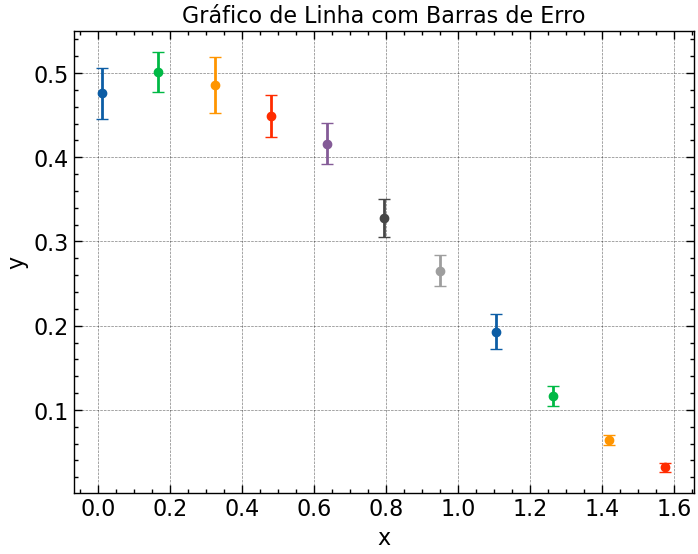

In [290]:
import matplotlib.pyplot as plt

# Dados

ret_Irr_b_in


# Calcular médias e desvios padrão para cada ponto x
means = [sum(y_vals) / len(y_vals) for y_vals in ret_Irr_b_in]
stds = [((sum([(val - mean) ** 2 for val in y_vals]) / len(y_vals)) ** 0.5) for y_vals, mean in zip(ret_Irr_b_in, means)]

# Configurar o gráfico
for i in range(11):
    plt.errorbar(th[i], means[i], yerr=stds[i], fmt='o', capsize=4)

# Rotular os eixos
plt.xlabel('x')
plt.ylabel('y')

# Título do gráfico
plt.title('Gráfico de Linha com Barras de Erro')

# Mostrar o gráfico
plt.show()

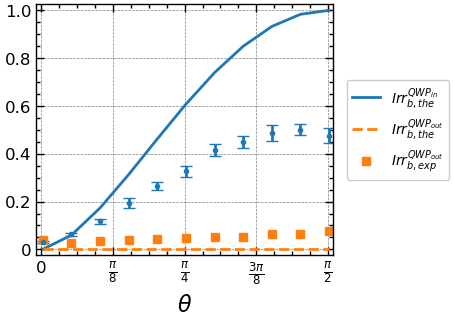

In [84]:
import string
plt.figure(figsize = (7.5, 3.2), constrained_layout = True)
#plt.subplots(figsize=(6.5, 3.2))
font = {'family': 'Verdana', 'color':  'black', 'size': 20}
#
plt.style.use(['science', 'notebook', 'grid'])
ax0 = plt.subplot(121)
plt.gca().set_xlim([-0.01,3.14])
plt.gca().set_ylim([-0.01,0.52])
#
# simulation
#
plt.plot(th[:len(th)//2+1], the_Irr_b_in[:len(th)//2+1], '-' ,
         color='#1f77b4', label = r'$Irr_{b, the}^{QWP_{in}}$')
#plt.plot(th[:len(th)//2+1], sim_Irr_b_in[:len(th)//2+1], 'v' ,
#         color='#1f77b4', label = r'$Irr_{b, sim}^{QWP_{in}}$')
#
# Calcular médias e desvios padrão para cada ponto x
#
means = [sum(y_vals) / len(y_vals) for y_vals in ret_Irr_b_in]
stds = [((sum([(val - mean) ** 2 for val in y_vals]) / len(y_vals)) ** 0.5) for y_vals, mean in zip(ret_Irr_b_in, means)]
for i in range(11):
    plt.errorbar(th[i], means[i], yerr=stds[i], fmt='.', capsize=4, color='#1f77b4')
#
#plt.plot(th[:len(th)//2+1], ret_Irr_b_in[:len(th)//2+1], 'o' ,
#         color='#1f77b4', label = r'$Irr_{b, exp}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], the_Irr_b_out[:len(th)//2+1], '--',
         color='#ff7f0e', label = r'$Irr_{b,the}^{QWP_{out}}$')
#plt.plot(th[:len(th)//2+1], sim_Irr_b_out[:len(th)//2+1], '^',
#         color='#ff7f0e', label = r'$Irr_{b,sim}^{QWP_{out}}$')
plt.plot(th[:len(th)//2+1], ret_Irr_b_out[:len(th)//2+1], 's',
         color='#ff7f0e', label = r'$Irr_{b,exp}^{QWP_{out}}$')
#
#
plt.legend(bbox_to_anchor=(1.22, 0.5), loc='center',
           borderaxespad=0, fontsize=10)
#, frameon=False, handlelength=1.5
plt.xlabel(r'$\theta$')
tick_posx= [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
#, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi]
labelsx = ['0', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$',
           r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$']
#, r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$'
#, r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$']
tick_posy= [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labelsy = ['0', '0.2', '0.4', '0.6', '0.8', '1.0']
#tick_posx= [0, 5]
#labelsx = ['0', '5']
plt.xlim([-0.025, np.pi/2+0.025])
plt.ylim([-0.025, 1.025])
plt.xticks(tick_posx, labelsx)
plt.yticks(tick_posy, labelsy)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.tick_params('y', labelleft=False)
#ax1.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax1.transAxes, 
#            size=20, weight='bold')
#
#plt.tight_layout()
#plt.savefig('zgraph_CCR_vpv=0_sim.pdf', format='pdf', dpi = 1200, bbox_inches='tight')
plt.show()

<Figure size 720x600 with 0 Axes>

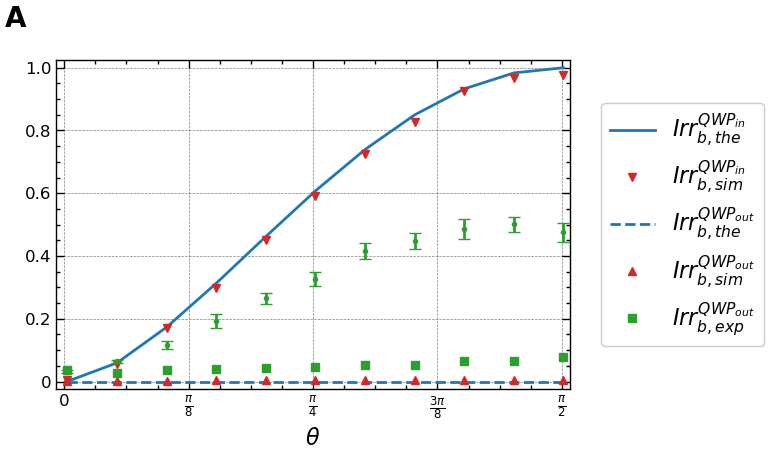

In [94]:
import string
plt.figure(figsize = (7.2,6), constrained_layout = True)
plt.subplots(figsize=(13, 4.79))
font = {'family': 'Verdana', 'color':  'black', 'size': 20}
#
#
# FIRST GRAPH
#
#
ax0 = plt.subplot(121)
plt.style.use(['science', 'notebook', 'grid'])
plt.gca().set_xlim([-0.01,6.28])
plt.gca().set_ylim([-0.01,0.52])
#
# b
#
plt.plot(th[:len(th)//2+1], the_Irr_b_in[:len(th)//2+1], '-' ,
         color='#1f77b4', label = r'$Irr_{b, the}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], sim_Irr_b_in[:len(th)//2+1], 'v' ,
         color='#d62728', label = r'$Irr_{b, sim}^{QWP_{in}}$')
for i in range(11):
    plt.errorbar(th[i], means[i], yerr=stds[i], fmt='.', capsize=4, color='#2ca02c')
#plt.plot(th[:len(th)//2+1], mit_Irr_b_in[:len(th)//2+1], 'o' ,
#         color='#2ca02c', label = r'$Irr_{b, exp}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], the_Irr_b_out[:len(th)//2+1], '--',
         color='#1f77b4', label = r'$Irr_{b,the}^{QWP_{out}}$')
plt.plot(th[:len(th)//2+1], sim_Irr_b_out[:len(th)//2+1], '^',
         color='#d62728', label = r'$Irr_{b,sim}^{QWP_{out}}$')
plt.plot(th[:len(th)//2+1], ret_Irr_b_out[:len(th)//2+1], 's',
         color='#2ca02c', label = r'$Irr_{b,exp}^{QWP_{out}}$')
#
# Inseri as letras para identificar os gráficos
#
ax0.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax0.transAxes, 
            size=20, weight='bold')
#
# subplot configs
#
plt.legend(bbox_to_anchor=(1.22, 0.5), loc='center',
           borderaxespad=0, fontsize=16)
plt.xlabel(r'$\theta$')
tick_posx= [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
labelsx = ['0', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$',
           r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$']
tick_posy= [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labelsy = ['0', '0.2', '0.4', '0.6', '0.8', '1.0']
plt.xlim([-0.025, np.pi/2+0.025])
plt.ylim([-0.025, 1.025])
plt.xticks(tick_posx, labelsx)
plt.yticks(tick_posy, labelsy)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
#plt.savefig('zgraph_b_and_WZ.pdf', format='pdf', dpi = 1200, bbox_inches='tight')
plt.show()

## Mitigação $b_{in}$

In [291]:
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter

### Retrieve do job da mitigação

In [292]:
print(device)
qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
qubit_list = [1,3,4,5] # os qubits para os quais aplicaremos calibracao de medidas
meas_calibs, state_labels = complete_meas_cal(qubit_list = qubit_list, qr = qr)
job_ret_b_in = device.retrieve_job('chdn6tim9ctescqge6gg')
print(job_ret_b_in.job_id())
job_monitor(job_ret_b_in)
meas_fitter = CompleteMeasFitter(job_ret_b_in.result(), state_labels)

ibm_nairobi
chdn6tim9ctescqge6gg
Job Status: job has successfully run


In [300]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
mit_rhob_AbWZ_in             = np.zeros(th.shape[0], dtype=object)
mit_rhob_0bWZ_in             = np.zeros(th.shape[0], dtype=object)
mit_Phi_b_0bWZ_in            = np.zeros(th.shape[0], dtype=object)
mit_Irr_b_in                 = []

In [301]:
print(device)
for j in range(11):
    print('-----------------------------------------')
    print('j = {:2d}  - theta = {}'.format(j, th[j]))
    print('-----------------------------------------')
    k = 10*j
    x = []
    for l in range(k, k+10):
        print('l = {:2d}'.format(l))
        print(list_ids_b_in_[l])
        job_ret_b_in = device.retrieve_job(list_ids_b_in_[l])
        mitigated_results_b_in = meas_fitter.filter.apply(job_ret_b_in.result())
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]]) # circuit for state tomography
        qstf_mit_b_in = StateTomographyFitter(mitigated_results_b_in, qstc)
        print(job_ret_b_in.job_id())
        #
        # rho
        #
        mit_rhob_AbWZ_in[j] = qstf_mit_b_in.fit(method='lstsq')
        #
        mit_rhob_0bWZ_in[j] = projM_np(8, '0', mit_rhob_AbWZ_in[j])
        mit_Phi_b_0bWZ_in[j] = dephasing_map_3qubits_np(mit_rhob_0bWZ_in[j])
        x.append(entropy(mit_Phi_b_0bWZ_in[j]) - entropy(mit_rhob_0bWZ_in[j]))
        print(x[l-k])
        if len(x) % 10 ==0:
            mit_Irr_b_in.append(x)
            print(mit_Irr_b_in)

ibm_nairobi
-----------------------------------------
j =  0  - theta = 0.01
-----------------------------------------
l =  0
chqq08s2b9sdqn3pvb6g
chqq08s2b9sdqn3pvb6g
0.03467726503721946
l =  1
chqcv3taqbbvbu0mhg80
chqcv3taqbbvbu0mhg80
0.03499350818626584
l =  2
chqcs4v8rmtc64rtl1qg
chqcs4v8rmtc64rtl1qg
0.031734438537150855
l =  3
chqck08uhh1ldcq57rkg
chqck08uhh1ldcq57rkg
0.03747307963274549
l =  4
chqci48uhh1ldcq56d6g
chqci48uhh1ldcq56d6g
0.03354895424061283
l =  5
chqcfcv8rmtc64rtasj0
chqcfcv8rmtc64rtasj0
0.02384103696518719
l =  6
chqccn42b9sdqn3gvt50
chqccn42b9sdqn3gvt50
0.03526119287362284
l =  7
chqca2n8rmtc64rt6i60
chqca2n8rmtc64rt6i60
0.025090699522216764
l =  8
chqc865aqbbvbu0lvgqg
chqc865aqbbvbu0lvgqg
0.024967499243181646
l =  9
chqc624pd6rr9jjrmun0
chqc624pd6rr9jjrmun0
0.031331259054648286
[[0.03467726503721946, 0.03499350818626584, 0.031734438537150855, 0.03747307963274549, 0.03354895424061283, 0.02384103696518719, 0.03526119287362284, 0.025090699522216764, 0.0249674992431

choc1tanajhpa649gk50
0.5133024091471434
l = 61
choc01f8rmtc64qfqtu0
choc01f8rmtc64qfqtu0
0.5568031130646591
l = 62
chobu5s2b9sdqn259e30
chobu5s2b9sdqn259e30
0.5753652332215995
l = 63
chobs9laqbbvbu79ieh0
chobs9laqbbvbu79ieh0
0.5662112231695211
l = 64
chobq9spd6rr9jif2m4g
chobq9spd6rr9jif2m4g
0.5804692567911756
l = 65
choboekpd6rr9jif1f7g
choboekpd6rr9jif1f7g
0.5593651432549318
l = 66
chobmhk2b9sdqn254fl0
chobmhk2b9sdqn254fl0
0.5018609077742027
l = 67
chobkmspd6rr9jieuro0
chobkmspd6rr9jieuro0
0.5914820370356746
l = 68
chobiqdaqbbvbu79bukg
chobiqdaqbbvbu79bukg
0.6202001366279554
l = 69
chobgv8uhh1ldcooagh0
chobgv8uhh1ldcooagh0
0.4954809851473203
[[0.03467726503721946, 0.03499350818626584, 0.031734438537150855, 0.03747307963274549, 0.03354895424061283, 0.02384103696518719, 0.03526119287362284, 0.025090699522216764, 0.024967499243181646, 0.031331259054648286], [0.07741827341873742, 0.07463498193070872, 0.07052550883061603, 0.08206769617014498, 0.08684103880139549, 0.058946533720788064, 0.0

chnpj5v8rmtc64q4cu7g
0.60801982812806
l = 101
chnph7n8rmtc64q4bnj0
chnph7n8rmtc64q4bnj0
0.6690711239670082
l = 102
chnpf942b9sdqn1q5ucg
chnpf942b9sdqn1q5ucg
0.6876392220226151
l = 103
chnpd5k2b9sdqn1q4ja0
chnpd5k2b9sdqn1q4ja0
0.6167465546322559
l = 104
chnp9o5aqbbvbu6u7g4g
chnp9o5aqbbvbu6u7g4g
0.6718586468252916
l = 105
chnp65cpd6rr9ji3ln10
chnp65cpd6rr9ji3ln10
0.6566924216311623
l = 106
chnp2eguhh1ldcod2s7g
chnp2eguhh1ldcod2s7g
0.7092203559665117
l = 107
chnopv0uhh1ldcoctor0
chnopv0uhh1ldcoctor0
0.6153663180209423
l = 108
chnm5htaqbbvbu6sdgbg
chnm5htaqbbvbu6sdgbg
0.6659059852892946
l = 109
chnjhptaqbbvbu6qo6pg
chnjhptaqbbvbu6qo6pg
0.5741624312013645
[[0.03467726503721946, 0.03499350818626584, 0.031734438537150855, 0.03747307963274549, 0.03354895424061283, 0.02384103696518719, 0.03526119287362284, 0.025090699522216764, 0.024967499243181646, 0.031331259054648286], [0.07741827341873742, 0.07463498193070872, 0.07052550883061603, 0.08206769617014498, 0.08684103880139549, 0.0589465337207880

## Mitigação $b_{out}$

In [295]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
mit_rhob_AbWZ_out            = np.zeros(th.shape[0], dtype=object)
mit_rhob_0bWZ_out            = np.zeros(th.shape[0], dtype=object)
mit_Phi_b_0bWZ_out           = np.zeros(th.shape[0], dtype=object)
mit_Irr_b_out                = np.zeros(th.shape[0])

In [296]:
print(device)
for j in range(0, d):
    print(list_ids_b_out_[j])
    job_ret_b_out = device.retrieve_job(list_ids_b_out_[j])
    mitigated_results_b_out = meas_fitter.filter.apply(job_ret_b_out.result())
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]]) # circuit for state tomography
    qstf_mit_b_out = StateTomographyFitter(mitigated_results_b_out, qstc)
    print(job_ret_b_out.job_id())
    #
    # rho
    #
    mit_rhob_AbWZ_out[j] = qstf_mit_b_out.fit(method='lstsq')
    #
    mit_rhob_0bWZ_out[j] = projM_np(8, '0', mit_rhob_AbWZ_out[j])
    mit_Phi_b_0bWZ_out[j] = dephasing_map_3qubits_np(mit_rhob_0bWZ_out[j])
    mit_Irr_b_out[j] = entropy(mit_Phi_b_0bWZ_out[j]) - entropy(mit_rhob_0bWZ_out[j])
    print(mit_Irr_b_out[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chelpsn7uma4tn78rc2g
chelpsn7uma4tn78rc2g
0.03526333374323887
j =  0  - theta = 0.01
chep59kqqnv6prm1uccg
chep59kqqnv6prm1uccg
0.02683144962876466
j =  1  - theta = 0.16657963267948966
chesmsf9targ2vpmqkig
chesmsf9targ2vpmqkig
0.043816697799191284
j =  2  - theta = 0.3231592653589793
chf07ob66hmpifuql4jg
chf07ob66hmpifuql4jg
0.04378625863070365
j =  3  - theta = 0.479738898038469
chf0fj79targ2vpr406g
chf0fj79targ2vpr406g
0.05091796066560947
j =  4  - theta = 0.6363185307179586
chf0jqvppn69h5prdplg
chf0jqvppn69h5prdplg
0.05482866183605056
j =  5  - theta = 0.7928981633974483
chf0o1nppn69h5pri8a0
chf0o1nppn69h5pri8a0
0.06272817475628617
j =  6  - theta = 0.9494777960769379
chf0s8g4sb77opi8pskg
chf0s8g4sb77opi8pskg
0.06272525817446423
j =  7  - theta = 1.1060574287564275
chf10jmo5i9gdbb1rjsg
chf10jmo5i9gdbb1rjsg
0.08289324500276748
j =  8  - theta = 1.2626370614359173
chf4t0sp8f687ogloj2g
chf4t0sp8f687ogloj2g
0.0911561403120823
j =  9  - theta = 1.419216694115407
chf8gc6o5i9gd

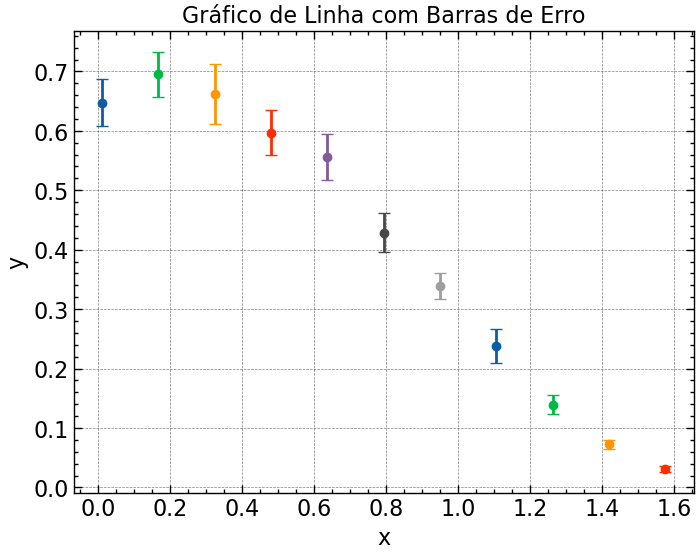

In [297]:
import matplotlib.pyplot as plt

# Dados

ret_Irr_b_in


# Calcular médias e desvios padrão para cada ponto x
means = [sum(y_vals) / len(y_vals) for y_vals in mit_Irr_b_in]
stds = [((sum([(val - mean) ** 2 for val in y_vals]) / len(y_vals)) ** 0.5) for y_vals, mean in zip(mit_Irr_b_in, means)]

# Configurar o gráfico
for i in range(11):
    plt.errorbar(th[i], means[i], yerr=stds[i], fmt='o', capsize=4)

# Rotular os eixos
plt.xlabel('x')
plt.ylabel('y')

# Título do gráfico
plt.title('Gráfico de Linha com Barras de Erro')

# Mostrar o gráfico
plt.show()

<Figure size 720x600 with 0 Axes>

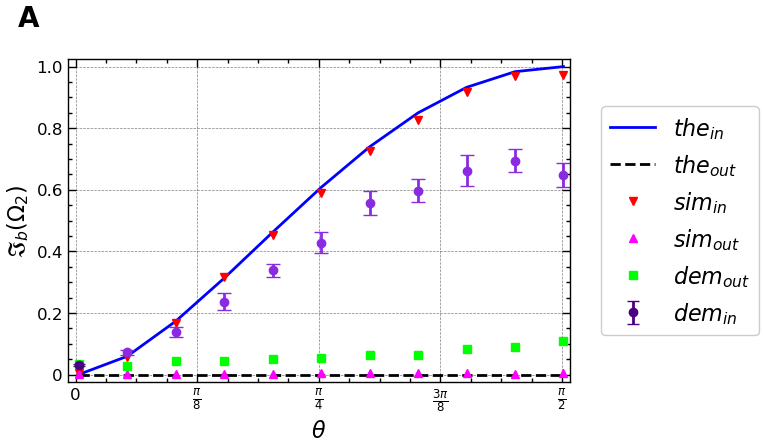

In [302]:
import string
plt.figure(figsize = (7.2,6), constrained_layout = True)
plt.subplots(figsize=(13, 4.79))
font = {'family': 'Verdana', 'color':  'black', 'size': 20}
#
#
# FIRST GRAPH
#
#
ax0 = plt.subplot(121)
plt.style.use(['science', 'notebook', 'grid'])
plt.gca().set_xlim([-0.01,6.28])
plt.gca().set_ylim([-0.01,0.52])
#
# b
#
plt.plot(th[:len(th)//2+1], the_Irr_b_in[:len(th)//2+1], '-' ,
         color='blue', label = r'$the_{in}}$')
#
plt.plot(th[:len(th)//2+1], the_Irr_b_out[:len(th)//2+1], '--',
         color='black', label = r'$the_{out}$')
#
#
#
plt.plot(th[:len(th)//2+1], sim_Irr_b_in[:len(th)//2+1], 'v' ,
         color='red', label = r'$sim_{in}}$')
#
plt.plot(th[:len(th)//2+1], sim_Irr_b_out[:len(th)//2+1], '^',
         color='magenta', label = r'$sim_{out}}$')
#
# Calcular médias e desvios padrão para cada ponto x
#
b_in_means = [sum(b_in_vals) / len(b_in_vals) for b_in_vals in mit_Irr_b_in]
#
b_in_stds = [((sum([(b_in_val - b_in_mean) ** 2 for b_in_val in b_in_vals]) / len(b_in_vals)) ** 0.5) \
        for b_in_vals, b_in_mean in zip(mit_Irr_b_in, b_in_means)]

plt.errorbar(th[0], b_in_means[0], yerr=b_in_stds[0], fmt='o', capsize=4, color='indigo', label = r'$dem_{in}}$')
for i in range(1,11):
    plt.errorbar(th[i], b_in_means[i], yerr=b_in_stds[i], fmt='o', capsize=5, color='blueviolet')
#
#
#
plt.plot(th[:len(th)//2+1], mit_Irr_b_out[:len(th)//2+1], 's',
         color='lime', label = r'$dem_{out}}$')
#
# Insere as letras para identificar os gráficos
#
ax0.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax0.transAxes, 
            size=20, weight='bold')
#
# subplot configs
#
plt.legend(bbox_to_anchor=(1.22, 0.5), loc='center',
           borderaxespad=0, fontsize=16)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\mathfrak{I}_b(\Omega_2)$')
tick_posx= [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
labelsx = ['0', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$',
           r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$']
tick_posy= [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labelsy = ['0', '0.2', '0.4', '0.6', '0.8', '1.0']
plt.xlim([-0.025, np.pi/2+0.025])
plt.ylim([-0.025, 1.025])
plt.xticks(tick_posx, labelsx)
plt.yticks(tick_posy, labelsy)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig('zgraph_b_and_WZ.pdf', format='pdf', dpi = 1200, bbox_inches='tight')
plt.show()

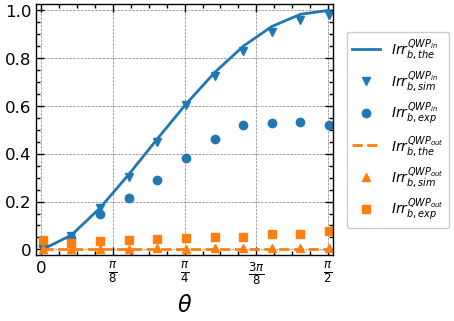

# Irrealidade dos átomos fora do IMZ

## BBO$_{p}$ - QWP$_{in}$

<img src = 'setup_realism.jpg' width = '90%'>

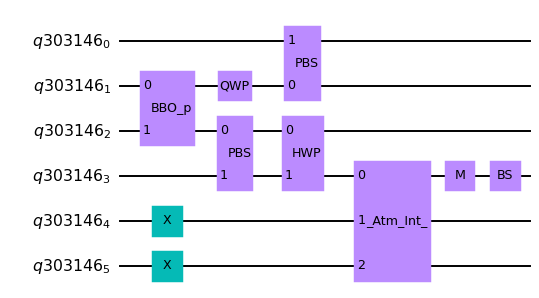

In [303]:
def qc_QCRWZ_in(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])             # BBO_p
    qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                           # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                     # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                     # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                     # HWP
    qc.x(4); qc.x(5)                                                          # Atoms's initial state
    qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                           # Phase
    qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRWZ_in_ = qc_QCRWZ_in(math.pi); qc_QCRWZ_in_.draw(output = 'mpl', scale = 0.7)

### Retrieve

In [113]:
jobs_ids_WZ_in

['chflp5g4sb77opise4h0',
 'chfmupf9targ2vqg4ovg',
 'chfn93vppn69h5qgh9bg',
 'chfq84nppn69h5qidi8g',
 'chfu8ar66hmpifvk570g',
 'chg26i84sb77opj32t40',
 'chg4bpj66hmpifvmr7cg',
 'chg4vseo5i9gdbbtoivg',
 'chn7f8cnsmp20v4ndlsg',
 'chg9h2vppn69h5qps3r0',
 'chg9vh04sb77opj7690g',
 'chga4deo5i9gdbc0mbg0',
 'chgaab7ppn69h5qqcmcg',
 'chgafor66hmpifvq95t0',
 'chgak7g4sb77opj7jo0g',
 'chgaqmf9targ2vqqk010',
 'chgb26g4sb77opj7sjjg',
 'chgb6c4p8f687ohg1q3g',
 'chgbb9j66hmpifvqqjdg',
 'chgdhefppn69h5qsdej0',
 'chgfdug4sb77opjalt90']

In [114]:
f = open("jobs_ids_WZ_in.txt", "w")
f.write(str(jobs_ids_WZ_in))
f.close()

In [304]:
f = open("jobs_ids_WZ_in.txt","r")
list_ids_WZ_in_ = f.read().replace("'","").replace(" ","").replace("[","").replace("]","").split(",")
f.close()

In [305]:
list_ids_WZ_in_, len(list_ids_WZ_in_)

(['chflp5g4sb77opise4h0',
  'chfmupf9targ2vqg4ovg',
  'chfn93vppn69h5qgh9bg',
  'chfq84nppn69h5qidi8g',
  'chfu8ar66hmpifvk570g',
  'chg26i84sb77opj32t40',
  'chg4bpj66hmpifvmr7cg',
  'chg4vseo5i9gdbbtoivg',
  'chn7f8cnsmp20v4ndlsg',
  'chg9h2vppn69h5qps3r0',
  'chg9vh04sb77opj7690g',
  'chga4deo5i9gdbc0mbg0',
  'chgaab7ppn69h5qqcmcg',
  'chgafor66hmpifvq95t0',
  'chgak7g4sb77opj7jo0g',
  'chgaqmf9targ2vqqk010',
  'chgb26g4sb77opj7sjjg',
  'chgb6c4p8f687ohg1q3g',
  'chgbb9j66hmpifvqqjdg',
  'chgdhefppn69h5qsdej0',
  'chgfdug4sb77opjalt90'],
 21)

In [86]:
thmax = math.pi;   dth = thmax/20; th = np.arange(0, thmax+dth, dth); d = th.shape[0]
ret_rhoWZ_AbWZ_in            = np.zeros(th.shape[0], dtype=object)
ret_rhoWZ_AbWZ_out           = np.zeros(th.shape[0], dtype=object)
ret_rhoWZ_00WZ_in            = np.zeros(th.shape[0], dtype=object)
ret_rhoWZ_00WZ_out           = np.zeros(th.shape[0], dtype=object)
ret_Phi_WZ_00WZ_in           = np.zeros(th.shape[0], dtype=object)
ret_Phi_WZ_00WZ_out          = np.zeros(th.shape[0], dtype=object)
ret_Irr_WZ_in                = np.zeros(th.shape[0])
ret_Irr_WZ_out               = np.zeros(th.shape[0])
jobs_ids_WZ_in = []; jobs_ids_WZ_out = []

In [109]:
print(device)
for j in range(0, d):
    print(list_ids_WZ_in_[j])
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    job_ret_WZ_in = device.retrieve_job(list_ids_WZ_in_[j])
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    print(job_ret_WZ_in.job_id())
    qstf = StateTomographyFitter(job_ret_WZ_in.result(), qstc)
    #
    # rho
    #
    ret_rhoWZ_AbWZ_in[j] = qstf.fit(method='lstsq')
    ret_rhoWZ_00WZ_in[j] = projM_np(4, '00', ret_rhoWZ_AbWZ_in[j])
    ret_Phi_WZ_00WZ_in[j] = dephasing_map_2qubits_np(ret_rhoWZ_00WZ_in[j])
    ret_Irr_WZ_in[j] = entropy(ret_Phi_WZ_00WZ_in[j]) - entropy(ret_rhoWZ_00WZ_in[j])
    print(ret_Irr_WZ_in[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chflp5g4sb77opise4h0
chflp5g4sb77opise4h0
0.024420550505978245
j =  0  - theta = 0.01
chfmupf9targ2vqg4ovg
chfmupf9targ2vqg4ovg
0.05733418121856726
j =  1  - theta = 0.16657963267948966
chfn93vppn69h5qgh9bg
chfn93vppn69h5qgh9bg
0.1333744000036895
j =  2  - theta = 0.3231592653589793
chfq84nppn69h5qidi8g
chfq84nppn69h5qidi8g
0.21022785866895555
j =  3  - theta = 0.479738898038469
chfu8ar66hmpifvk570g
chfu8ar66hmpifvk570g
0.2841335172323498
j =  4  - theta = 0.6363185307179586
chg26i84sb77opj32t40
chg26i84sb77opj32t40
0.36763341335472643
j =  5  - theta = 0.7928981633974483
chg4bpj66hmpifvmr7cg
chg4bpj66hmpifvmr7cg
0.4227482538229752
j =  6  - theta = 0.9494777960769379
chg4vseo5i9gdbbtoivg
chg4vseo5i9gdbbtoivg
0.4307531447131727
j =  7  - theta = 1.1060574287564275
chn7f8cnsmp20v4ndlsg
chn7f8cnsmp20v4ndlsg
0.42036940781889176
j =  8  - theta = 1.2626370614359173
chg9h2vppn69h5qps3r0
chg9h2vppn69h5qps3r0
0.4856804857055659
j =  9  - theta = 1.419216694115407
chg9vh04sb77opj76

### Simulation $WZ_{in}$

In [306]:
thmax = math.pi;   dth = thmax/20; th = np.arange(0, thmax+dth, dth); d = th.shape[0]
sim_rhoWZ_AbWZ_in            = np.zeros(th.shape[0], dtype=object)
sim_rhoWZ_AbWZ_out           = np.zeros(th.shape[0], dtype=object)
sim_rhoWZ_00WZ_in            = np.zeros(th.shape[0], dtype=object)
sim_rhoWZ_00WZ_out           = np.zeros(th.shape[0], dtype=object)
sim_Phi_WZ_00WZ_in           = np.zeros(th.shape[0], dtype=object)
sim_Phi_WZ_00WZ_out          = np.zeros(th.shape[0], dtype=object)
sim_Irr_WZ_in                = np.zeros(th.shape[0])
sim_Irr_WZ_out               = np.zeros(th.shape[0])

<img src = 'setup_realism.jpg' width = '90%'>

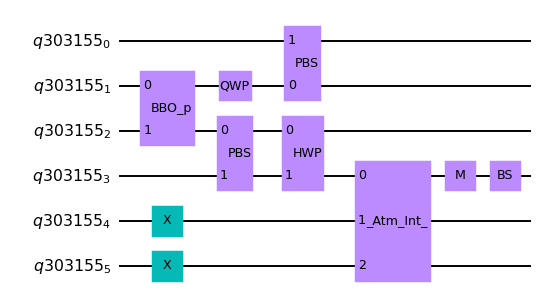

In [307]:
def qc_QCRWZ_in(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])             # BBO_p
    qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                           # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                     # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                     # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                     # HWP
    qc.x(4); qc.x(5)                                                          # Atoms's initial state
    qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                           # Phase
    qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRWZ_in_ = qc_QCRWZ_in(math.pi); qc_QCRWZ_in_.draw(output = 'mpl', scale = 0.7)

In [308]:
for j in range(0,d):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    #
    # Circuit
    #
    qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    #
    # Tomography
    #
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    job = qiskit.execute(qstc, backend = simulator, shots=nshots)
    qstf = StateTomographyFitter(job.result(), qstc)
    #
    # rho
    #
    sim_rhoWZ_AbWZ_in[j] = qstf.fit(method='lstsq')
    sim_rhoWZ_00WZ_in[j] = projM_np(4, '00', sim_rhoWZ_AbWZ_in[j])
    sim_Phi_WZ_00WZ_in[j] = dephasing_map_2qubits_np(sim_rhoWZ_00WZ_in[j])
    sim_Irr_WZ_in[j] = entropy(sim_Phi_WZ_00WZ_in[j]) - entropy(sim_rhoWZ_00WZ_in[j])
    print(sim_Irr_WZ_in[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

0.002846196696978026
j =  0  - theta = 0.0
0.05936362043977004
j =  1  - theta = 0.15707963267948966
0.16809027681348346
j =  2  - theta = 0.3141592653589793
0.280795139507007
j =  3  - theta = 0.47123889803846897
0.4334971325243274
j =  4  - theta = 0.6283185307179586
0.595755461968385
j =  5  - theta = 0.7853981633974483
0.7079253108930156
j =  6  - theta = 0.9424777960769379
0.8386571180691196
j =  7  - theta = 1.0995574287564276
0.915750261444732
j =  8  - theta = 1.2566370614359172
0.9443418140101306
j =  9  - theta = 1.413716694115407
0.97972031284043
j = 10  - theta = 1.5707963267948966
0.9555982536470137
j = 11  - theta = 1.7278759594743862
0.9086670280215625
j = 12  - theta = 1.8849555921538759
0.8345655863336745
j = 13  - theta = 2.0420352248333655
0.7090521495847468
j = 14  - theta = 2.199114857512855
0.572285236551444
j = 15  - theta = 2.356194490192345
0.44276347060837234
j = 16  - theta = 2.5132741228718345
0.29669291175413215
j = 17  - theta = 2.670353755551324
0.1632510

## BBO$_{p}$ - QWP$_{out}$

<img src = 'setup_realism.jpg' width = '90%'>

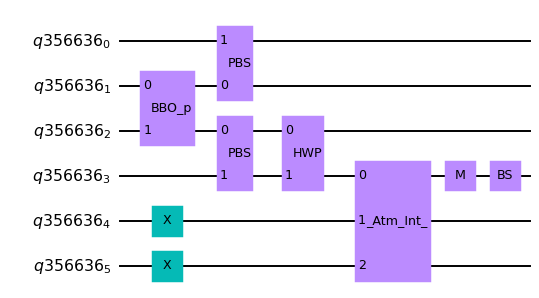

In [309]:
def qc_QCRWZ_out(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])             # BBO_p
    #qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                          # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                     # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                     # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                     # HWP
    qc.x(4); qc.x(5)                                                          # Atoms's initial state
    qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                           # Phase
    qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRWZ_out_ = qc_QCRWZ_out(math.pi); qc_QCRWZ_out_.draw(output = 'mpl', scale = 0.7)

### Retrieve

In [310]:
f = open("jobs_ids_WZ_out.txt","r")
list_ids_WZ_out_ = f.read().replace("'","").replace(" ","").replace("[","").replace("]","").split(",")
f.close()

In [311]:
list_ids_WZ_out_, len(list_ids_WZ_out_)

(['chgnhbfppn69h5r1qlkg',
  'chgumofppn69h5r5idhg',
  'chhcchnppn69h5rfrs60',
  'chhrl12ae4cj9g89p1g0',
  'chhsgk46f7i49rudfnf0',
  'chhsiviae4cj9g8b6ls0',
  'chhst86pqnphtdr8mgm0',
  'chhsvdepqnphtdr8psa0',
  'chht2746f7i49rueb0i0',
  'chht4bc6f7i49ruee6o0',
  'chhtafj7ca17j320kbe0',
  'chhtr4upqnphtdra5t70',
  'chhtt7mpqnphtdra9770',
  'chhuie6pqnphtdrbcig0',
  'chhut52ae4cj9g8es5m0',
  'chhv4epike34bjm9vc1g',
  'chhvht6pqnphtdrd1un0',
  'chibquqae4cj9g8vdkhg',
  'chicjdc6f7i49rv352qg',
  'chicn0k6f7i49rv38pp0',
  'chicqmc6f7i49rv3cip0'],
 21)

In [94]:
print(device)
for j in range(0, d):
    print(list_ids_WZ_out_[j])
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    job_ret_WZ_out = device.retrieve_job(list_ids_WZ_out_[j])
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    print(job_ret_WZ_out.job_id())
    qstf = StateTomographyFitter(job_ret_WZ_out.result(), qstc)
    #
    # rho
    #
    ret_rhoWZ_AbWZ_out[j] = qstf.fit(method='lstsq')
    ret_rhoWZ_00WZ_out[j] = projM_np(4, '00', ret_rhoWZ_AbWZ_out[j])
    ret_Phi_WZ_00WZ_out[j] = dephasing_map_2qubits_np(ret_rhoWZ_00WZ_out[j])
    ret_Irr_WZ_out[j] = entropy(ret_Phi_WZ_00WZ_out[j]) - entropy(ret_rhoWZ_00WZ_out[j])
    print(ret_Irr_WZ_out[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chgnhbfppn69h5r1qlkg
chgnhbfppn69h5r1qlkg
0.01948159624241863
j =  0  - theta = 0.01
chgumofppn69h5r5idhg
chgumofppn69h5r5idhg
0.020671786785510737
j =  1  - theta = 0.16657963267948966
chhcchnppn69h5rfrs60
chhcchnppn69h5rfrs60
0.05599711023869869
j =  2  - theta = 0.3231592653589793
chhrl12ae4cj9g89p1g0
chhrl12ae4cj9g89p1g0
0.03541809460564793
j =  3  - theta = 0.479738898038469
chhsgk46f7i49rudfnf0
chhsgk46f7i49rudfnf0
0.05042617687790507
j =  4  - theta = 0.6363185307179586
chhsiviae4cj9g8b6ls0
chhsiviae4cj9g8b6ls0
0.046583070594177545
j =  5  - theta = 0.7928981633974483
chhst86pqnphtdr8mgm0
chhst86pqnphtdr8mgm0
0.050871770035786246
j =  6  - theta = 0.9494777960769379
chhsvdepqnphtdr8psa0
chhsvdepqnphtdr8psa0
0.06728050262806273
j =  7  - theta = 1.1060574287564275
chht2746f7i49rueb0i0
chht2746f7i49rueb0i0
0.08121746100671101
j =  8  - theta = 1.2626370614359173
chht4bc6f7i49ruee6o0
chht4bc6f7i49ruee6o0
0.0839476659478936
j =  9  - theta = 1.419216694115407
chhtafj7ca1

### Simulation $WZ_{out}$

<img src = 'setup_realism.jpg' width = '90%'>

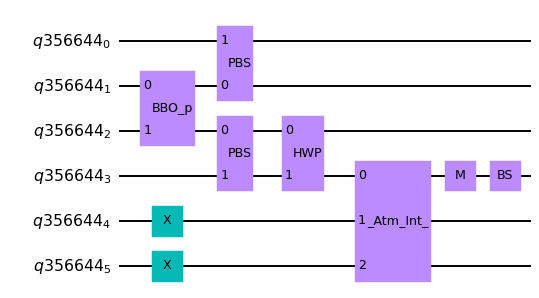

In [312]:
def qc_QCRWZ_out(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])             # BBO_p
    #qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                          # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                     # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                     # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                     # HWP
    qc.x(4); qc.x(5)                                                          # Atoms's initial state
    qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                           # Phase
    qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRWZ_out_ = qc_QCRWZ_out(math.pi); qc_QCRWZ_out_.draw(output = 'mpl', scale = 0.7)

In [313]:
for j in range(0,d):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    #
    # Circuit
    #
    qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    #
    # Tomography
    #
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    job = qiskit.execute(qstc, backend = simulator, shots=nshots)
    qstf = StateTomographyFitter(job.result(), qstc)
    #
    # rho
    #
    sim_rhoWZ_AbWZ_out[j] = qstf.fit(method='lstsq')
    sim_rhoWZ_00WZ_out[j] = projM_np(4, '00', sim_rhoWZ_AbWZ_out[j])
    sim_Phi_WZ_00WZ_out[j] = dephasing_map_2qubits_np(sim_rhoWZ_00WZ_out[j])
    sim_Irr_WZ_out[j] = entropy(sim_Phi_WZ_00WZ_out[j]) - entropy(sim_rhoWZ_00WZ_out[j])
    print(sim_Irr_WZ_out[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

0.0019535018173760382
j =  0  - theta = 0.0
0.0010226822988377536
j =  1  - theta = 0.15707963267948966
0.0019205918434587535
j =  2  - theta = 0.3141592653589793
0.002343081654074576
j =  3  - theta = 0.47123889803846897
0.002284027231307814
j =  4  - theta = 0.6283185307179586
0.0024213690184851783
j =  5  - theta = 0.7853981633974483
0.0017790296961802676
j =  6  - theta = 0.9424777960769379
0.0026848028019028185
j =  7  - theta = 1.0995574287564276
0.001978611287144022
j =  8  - theta = 1.2566370614359172
0.002613981328871251
j =  9  - theta = 1.413716694115407
0.005213787102350931
j = 10  - theta = 1.5707963267948966
0.0019780606034375675
j = 11  - theta = 1.7278759594743862
0.00334967610291044
j = 12  - theta = 1.8849555921538759
0.003639285968480191
j = 13  - theta = 2.0420352248333655
0.009973287812296894
j = 14  - theta = 2.199114857512855
0.008250070703372803
j = 15  - theta = 2.356194490192345
0.015845830299554026
j = 16  - theta = 2.5132741228718345
0.01944373073127595
j = 

## Teórico

In [314]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
the_Irr_WZ_in                 = np.zeros(th.shape[0])
the_Irr_WZ_out                = np.zeros(th.shape[0])

In [315]:
for j in range(0,d):
    c_plus = np.cos(th[j]/2)
    c_minus = np.sqrt(1 - c_plus**2)
    the_Irr_WZ_in[j] = -1.0 * c_plus**2 * np.log2(1.0 * c_plus**2) - c_minus**2 * np.log2(c_minus**2)
    the_Irr_WZ_out[j] = 0
    print(the_Irr_WZ_in[j])

0.00041825654974191235
0.05960827160488702
0.1732975820045815
0.3131570775169316
0.4621607944535125
0.607604014273341
0.7394634336049204
0.849811316538504
0.932583510389106
0.9834895100553851
0.9999819663871292
0.9812490235560026
0.9282133180193721
0.8435331680632676
0.7316110586657141
0.5986265342290418
0.45263200118252755
0.30379873295430637
0.1650395819160478
0.05377438056525288
4.038739397709968e-31


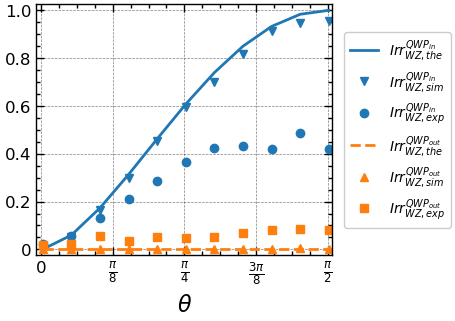

In [111]:
import string
plt.figure(figsize = (7.5, 3.2), constrained_layout = True)
#plt.subplots(figsize=(6.5, 3.2))
font = {'family': 'Verdana', 'color':  'black', 'size': 20}
#
plt.style.use(['science', 'notebook', 'grid'])
ax0 = plt.subplot(121)
plt.gca().set_xlim([-0.01,3.14])
plt.gca().set_ylim([-0.01,0.52])
#
# simulation
#
plt.plot(th[:len(th)//2+1], the_Irr_WZ_in[:len(th)//2+1], '-' ,
         color='#1f77b4', label = r'$Irr_{WZ, the}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], sim_Irr_WZ_in[:len(th)//2+1], 'v' ,
         color='#1f77b4', label = r'$Irr_{WZ, sim}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], ret_Irr_WZ_in[:len(th)//2+1], 'o' ,
         color='#1f77b4', label = r'$Irr_{WZ, exp}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], the_Irr_WZ_out[:len(th)//2+1], '--',
         color='#ff7f0e', label = r'$Irr_{WZ,the}^{QWP_{out}}$')
plt.plot(th[:len(th)//2+1], sim_Irr_WZ_out[:len(th)//2+1], '^',
         color='#ff7f0e', label = r'$Irr_{WZ,sim}^{QWP_{out}}$')
plt.plot(th[:len(th)//2+1], ret_Irr_WZ_out[:len(th)//2+1], 's',
         color='#ff7f0e', label = r'$Irr_{WZ,exp}^{QWP_{out}}$')
#
#
plt.legend(bbox_to_anchor=(1.22, 0.5), loc='center',
           borderaxespad=0, fontsize=10)
#, frameon=False, handlelength=1.5
plt.xlabel(r'$\theta$')
tick_posx= [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
#, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi]
labelsx = ['0', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$',
           r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$']
#, r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$'
#, r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$']
tick_posy= [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labelsy = ['0', '0.2', '0.4', '0.6', '0.8', '1.0']
#tick_posx= [0, 5]
#labelsx = ['0', '5']
plt.xlim([-0.025, np.pi/2+0.025])
plt.ylim([-0.025, 1.025])
plt.xticks(tick_posx, labelsx)
plt.yticks(tick_posy, labelsy)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.tick_params('y', labelleft=False)
#ax1.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax1.transAxes, 
#            size=20, weight='bold')
#
#plt.tight_layout()
plt.savefig('zgraph_WZ.pdf', format='pdf', dpi = 1200, bbox_inches='tight')
plt.show()

# Mitigação

In [100]:
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter

## Mitigação $WZ_{in}$

In [316]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
mit_rhoWZ_AbWZ_in             = np.zeros(th.shape[0], dtype=object)
mit_rhoWZ_0bWZ_in             = np.zeros(th.shape[0], dtype=object)
mit_Phi_WZ_0bWZ_in            = np.zeros(th.shape[0], dtype=object)
mit_Irr_WZ_in                 = np.zeros(th.shape[0])

### Retrieve do job da mitigação

In [185]:
print(device)
qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
qubit_list = [1,3,4,5] # os qubits para os quais aplicaremos calibracao de medidas
meas_calibs, state_labels = complete_meas_cal(qubit_list = qubit_list, qr = qr)
job_ret_WZ_in = device.retrieve_job('chdn6tim9ctescqge6gg')
print(job_ret_WZ_in.job_id())
job_monitor(job_ret_WZ_in)
meas_fitter = CompleteMeasFitter(job_ret_WZ_in.result(), state_labels)

ibm_nairobi
chdn6tim9ctescqge6gg
Job Status: job has successfully run


In [317]:
print(device)
for j in range(0, d):
    print(list_ids_WZ_in_[j])
    job_ret_WZ_in = device.retrieve_job(list_ids_WZ_in_[j])
    mitigated_results_WZ_in = meas_fitter.filter.apply(job_ret_WZ_in.result())
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]]) # circuit for state tomography
    qstf_mit_WZ_in = StateTomographyFitter(mitigated_results_WZ_in, qstc)
    print(job_ret_WZ_in.job_id())
    #
    # rho
    #
    mit_rhoWZ_AbWZ_in[j] = qstf_mit_WZ_in.fit(method='lstsq')
    #
    mit_rhoWZ_0bWZ_in[j] = projM_np(4, '00', mit_rhoWZ_AbWZ_in[j])
    mit_Phi_WZ_0bWZ_in[j] = dephasing_map_2qubits_np(mit_rhoWZ_0bWZ_in[j])
    mit_Irr_WZ_in[j] = entropy(mit_Phi_WZ_0bWZ_in[j]) - entropy(mit_rhoWZ_0bWZ_in[j])
    print(mit_Irr_WZ_in[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chflp5g4sb77opise4h0
chflp5g4sb77opise4h0
0.01778897645484956
j =  0  - theta = 0.01
chfmupf9targ2vqg4ovg
chfmupf9targ2vqg4ovg
0.07565548932247312
j =  1  - theta = 0.16657963267948966
chfn93vppn69h5qgh9bg
chfn93vppn69h5qgh9bg
0.22087406921247577
j =  2  - theta = 0.3231592653589793
chfq84nppn69h5qidi8g
chfq84nppn69h5qidi8g
0.3387184839712174
j =  3  - theta = 0.479738898038469
chfu8ar66hmpifvk570g
chfu8ar66hmpifvk570g
0.5155388798237962
j =  4  - theta = 0.6363185307179586
chg26i84sb77opj32t40
chg26i84sb77opj32t40
0.6170718037958869
j =  5  - theta = 0.7928981633974483
chg4bpj66hmpifvmr7cg
chg4bpj66hmpifvmr7cg
0.7091330921014838
j =  6  - theta = 0.9494777960769379
chg4vseo5i9gdbbtoivg
chg4vseo5i9gdbbtoivg
0.8252539617750528
j =  7  - theta = 1.1060574287564275
chn7f8cnsmp20v4ndlsg
chn7f8cnsmp20v4ndlsg
0.8212785563506153
j =  8  - theta = 1.2626370614359173
chg9h2vppn69h5qps3r0
chg9h2vppn69h5qps3r0
0.8670034101159474
j =  9  - theta = 1.419216694115407
chg9vh04sb77opj7690g

## Mitigação $WZ_{out}$

In [318]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
mit_rhoWZ_AbWZ_out            = np.zeros(th.shape[0], dtype=object)
mit_rhoWZ_0bWZ_out            = np.zeros(th.shape[0], dtype=object)
mit_Phi_WZ_0bWZ_out           = np.zeros(th.shape[0], dtype=object)
mit_Irr_WZ_out                = np.zeros(th.shape[0])

### Retrieve do job da mitigação

In [319]:
print(device)
for j in range(0, d):
    print(list_ids_WZ_out_[j])
    job_ret_WZ_out = device.retrieve_job(list_ids_WZ_out_[j])
    mitigated_results_WZ_out = meas_fitter.filter.apply(job_ret_WZ_out.result())
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]]) # circuit for state tomography
    qstf_mit_WZ_out = StateTomographyFitter(mitigated_results_WZ_out, qstc)
    print(job_ret_WZ_out.job_id())
    #
    # rho
    #
    mit_rhoWZ_AbWZ_out[j] = qstf_mit_WZ_out.fit(method='lstsq')
    #
    mit_rhoWZ_0bWZ_out[j] = projM_np(4, '00', mit_rhoWZ_AbWZ_out[j])
    mit_Phi_WZ_0bWZ_out[j] = dephasing_map_2qubits_np(mit_rhoWZ_0bWZ_out[j])
    mit_Irr_WZ_out[j] = entropy(mit_Phi_WZ_0bWZ_out[j]) - entropy(mit_rhoWZ_0bWZ_out[j])
    print(mit_Irr_WZ_out[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chgnhbfppn69h5r1qlkg
chgnhbfppn69h5r1qlkg
0.009904305722228335
j =  0  - theta = 0.01
chgumofppn69h5r5idhg
chgumofppn69h5r5idhg
0.013083448167353628
j =  1  - theta = 0.16657963267948966
chhcchnppn69h5rfrs60
chhcchnppn69h5rfrs60
0.053109884599857715
j =  2  - theta = 0.3231592653589793
chhrl12ae4cj9g89p1g0
chhrl12ae4cj9g89p1g0
0.023372352580879774
j =  3  - theta = 0.479738898038469
chhsgk46f7i49rudfnf0
chhsgk46f7i49rudfnf0
0.03957100861943741
j =  4  - theta = 0.6363185307179586
chhsiviae4cj9g8b6ls0
chhsiviae4cj9g8b6ls0
0.045295459508101155
j =  5  - theta = 0.7928981633974483
chhst86pqnphtdr8mgm0
chhst86pqnphtdr8mgm0
0.0513674659112307
j =  6  - theta = 0.9494777960769379
chhsvdepqnphtdr8psa0
chhsvdepqnphtdr8psa0
0.09096208159346653
j =  7  - theta = 1.1060574287564275
chht2746f7i49rueb0i0
chht2746f7i49rueb0i0
0.10448862068282272
j =  8  - theta = 1.2626370614359173
chht4bc6f7i49ruee6o0
chht4bc6f7i49ruee6o0
0.11159869994268279
j =  9  - theta = 1.419216694115407
chhtafj7c

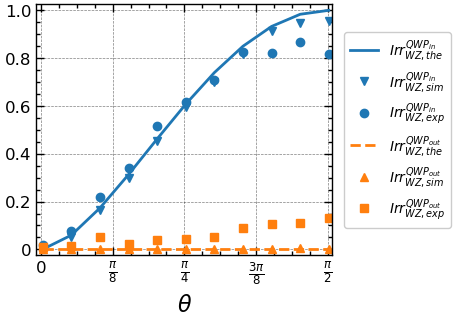

In [110]:
import string
plt.figure(figsize = (7.5, 3.2), constrained_layout = True)
#plt.subplots(figsize=(6.5, 3.2))
font = {'family': 'Verdana', 'color':  'black', 'size': 20}
#
plt.style.use(['science', 'notebook', 'grid'])
ax0 = plt.subplot(121)
plt.gca().set_xlim([-0.01,3.14])
plt.gca().set_ylim([-0.01,0.52])
#
# simulation
#
plt.plot(th[:len(th)//2+1], the_Irr_WZ_in[:len(th)//2+1], '-' ,
         color='#1f77b4', label = r'$Irr_{WZ, the}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], sim_Irr_WZ_in[:len(th)//2+1], 'v' ,
         color='#1f77b4', label = r'$Irr_{WZ, sim}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], mit_Irr_WZ_in[:len(th)//2+1], 'o' ,
         color='#1f77b4', label = r'$Irr_{WZ, exp}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], the_Irr_WZ_out[:len(th)//2+1], '--',
         color='#ff7f0e', label = r'$Irr_{WZ,the}^{QWP_{out}}$')
plt.plot(th[:len(th)//2+1], sim_Irr_WZ_out[:len(th)//2+1], '^',
         color='#ff7f0e', label = r'$Irr_{WZ,sim}^{QWP_{out}}$')
plt.plot(th[:len(th)//2+1], mit_Irr_WZ_out[:len(th)//2+1], 's',
         color='#ff7f0e', label = r'$Irr_{WZ,exp}^{QWP_{out}}$')
#
#
plt.legend(bbox_to_anchor=(1.22, 0.5), loc='center',
           borderaxespad=0, fontsize=10)
#, frameon=False, handlelength=1.5
plt.xlabel(r'$\theta$')
tick_posx= [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
#, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi]
labelsx = ['0', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$',
           r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$']
#, r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$'
#, r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$']
tick_posy= [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labelsy = ['0', '0.2', '0.4', '0.6', '0.8', '1.0']
#tick_posx= [0, 5]
#labelsx = ['0', '5']
plt.xlim([-0.025, np.pi/2+0.025])
plt.ylim([-0.025, 1.025])
plt.xticks(tick_posx, labelsx)
plt.yticks(tick_posy, labelsy)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.tick_params('y', labelleft=False)
#ax1.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax1.transAxes, 
#            size=20, weight='bold')
#
#plt.tight_layout()
plt.savefig('zgraph_WZ.pdf', format='pdf', dpi = 1200, bbox_inches='tight')
plt.show()

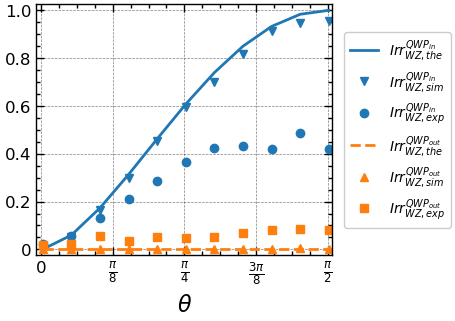

<Figure size 720x600 with 0 Axes>

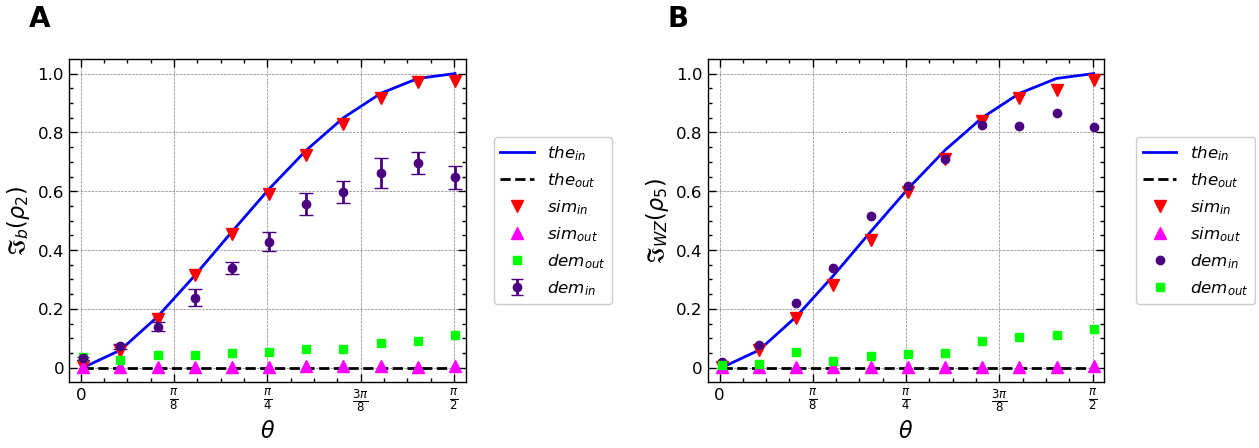

In [321]:
import string
plt.figure(figsize = (7.2,6), constrained_layout = True)
plt.subplots(figsize=(13, 4.79))
font = {'family': 'Verdana', 'color':  'black', 'size': 20}
#
#
# FIRST GRAPH
#
#
ax0 = plt.subplot(121)
plt.style.use(['science', 'notebook', 'grid'])
plt.gca().set_xlim([-0.01,6.28])
plt.gca().set_ylim([-0.01,0.52])
#
# b
#
plt.plot(th[:len(th)//2+1], the_Irr_b_in[:len(th)//2+1], '-' ,
         color='blue', label = r'$the_{in}}$')
#
plt.plot(th[:len(th)//2+1], the_Irr_b_out[:len(th)//2+1], '--',
         color='black', label = r'$the_{out}$')
#
#
#
plt.plot(th[:len(th)//2+1], sim_Irr_b_in[:len(th)//2+1], 'v', markersize=8,
         color='red', label = r'$sim_{in}}$')
#
plt.plot(th[:len(th)//2+1], sim_Irr_b_out[:len(th)//2+1], '^', markersize=8,
         color='magenta', label = r'$sim_{out}}$')
#
# Calcular médias e desvios padrão para cada ponto x
#
b_in_means = [sum(b_in_vals) / len(b_in_vals) for b_in_vals in mit_Irr_b_in]
#
b_in_stds = [((sum([(b_in_val - b_in_mean) ** 2 for b_in_val in b_in_vals]) / len(b_in_vals)) ** 0.5) \
        for b_in_vals, b_in_mean in zip(mit_Irr_b_in, b_in_means)]

plt.errorbar(th[0], b_in_means[0], yerr=b_in_stds[0], fmt='o', capsize=4, color='indigo', label = r'$dem_{in}}$')
for i in range(1,11):
    plt.errorbar(th[i], b_in_means[i], yerr=b_in_stds[i], fmt='o', capsize=5, color='indigo')
#
#
#
plt.plot(th[:len(th)//2+1], mit_Irr_b_out[:len(th)//2+1], 's',
         color='lime', label = r'$dem_{out}}$')
#
# Inseri as letras para identificar os gráficos
#
ax0.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax0.transAxes, 
            size=20, weight='bold')
#
# subplot configs
#
plt.legend(bbox_to_anchor=(1.22, 0.5), loc='center',
           borderaxespad=0, fontsize=12)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\mathfrak{I}_b(\rho_2)$')
tick_posx= [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
labelsx = ['0', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$',
           r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$']
tick_posy= [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labelsy = ['0', '0.2', '0.4', '0.6', '0.8', '1.0']
plt.xlim([-0.05, np.pi/2+0.05])
plt.ylim([-0.05, 1.05])
plt.xticks(tick_posx, labelsx)
plt.yticks(tick_posy, labelsy)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#
#
# SECOND GRAPH
#
#
ax1 = plt.subplot(122, sharey = ax0)
plt.style.use(['science', 'notebook', 'grid'])
plt.gca().set_xlim([-0.01,6.28])
plt.gca().set_ylim([-0.01,0.52])
#
# WZ
#
plt.plot(th[:len(th)//2+1], the_Irr_WZ_in[:len(th)//2+1], '-' ,
         color='blue', label = r'$the_{in}}$')
plt.plot(th[:len(th)//2+1], the_Irr_WZ_out[:len(th)//2+1], '--',
         color='black', label = r'$the_{out}}$')
#
#
#
plt.plot(th[:len(th)//2+1], sim_Irr_WZ_in[:len(th)//2+1], 'v', markersize=8,
         color='red', label = r'$sim_{in}}$')
plt.plot(th[:len(th)//2+1], sim_Irr_WZ_out[:len(th)//2+1], '^', markersize=8,
         color='magenta', label = r'$sim_{out}}$')
#
#
#
plt.plot(th[:len(th)//2+1], mit_Irr_WZ_in[:len(th)//2+1], 'o' ,
         color='indigo', label = r'$dem_{in}}$')

plt.plot(th[:len(th)//2+1], mit_Irr_WZ_out[:len(th)//2+1], 's',
         color='lime', label = r'$dem_{out}}$')
#
# Inseri as letras para identificar os gráficos
#
ax1.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax1.transAxes, 
            size=20, weight='bold')
#
# subplot configs
#
plt.legend(bbox_to_anchor=(1.23, 0.5), loc='center',
           borderaxespad=0, fontsize=12)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\mathfrak{I}_{WZ}(\rho_5)$')
tick_posx= [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
labelsx = ['0', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$',
           r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$']
tick_posy= [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labelsy = ['0', '0.2', '0.4', '0.6', '0.8', '1.0']
plt.xlim([-0.05, np.pi/2+0.05])
plt.ylim([-0.05, 1.05])
plt.xticks(tick_posx, labelsx)
plt.yticks(tick_posy, labelsy)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#
# GENERAL CONFIGS AND SAVES
#
plt.tight_layout()
plt.savefig('zgraph_b_and_WZ.pdf', format='pdf', dpi = 1200, bbox_inches='tight')
plt.show()